In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf

%matplotlib inline

In [35]:
def plot_loss_accuracy (history):
    # plot loss during training
    plt.figure(figsize=(8,7))
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.xlabel('Epochs')
    pyplot.legend()
    pyplot.show()
    return
    
def evaluate_model(title, model, history, X_train, y_train, X_test, y_test):
    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Title = ', title)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss_accuracy during training
    plot_loss_accuracy (history)
    return
    
def get_model(act_function) :
    # return a model with a new activation function
    model = Sequential()
    # input layer 
    model.add(Dense(12, activation='relu', input_shape=(12,)))
    # hidden layer 
    model.add(Dense(8, activation=act_function))
    # output layer 
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_model_learning_rate_act(learning_rate, activation):
  # Creates a model given an activation and learning rate
  # Create an Adam optimizer with the given learning rate
  opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  
  # Create your binary classification model  
  model = Sequential()
  model.add(Dense(12, input_shape = (12,), activation = activation))
  model.add(Dense(8, activation = activation))
  model.add(Dense(1, activation = 'sigmoid'))
  
  # Compile your model with your optimizer, loss, and metrics
  model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

def create_model_learning_n_layer_nn(n_layer, n_neuron):
    # Creates a model given an activation and learning rate
    # Create an Adam optimizer with the given learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(12, input_shape = (12,), activation = 'relu'))
    if n_layer>0:
        for i in range(n_layer):
            model.add(Dense(n_neuron, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
  
    # Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

def create_model_learning_rate_opt(learning_rate, opt):
    # Creates a model given an learning rate and optimizer
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(12, input_shape = (12,), activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
  
    # Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

def create_model_opt(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [3]:
# Load the file
wine = pd.read_csv('datasets/wine.csv', sep=',')
df=wine.copy()
pd.set_option('display.max_columns',111)
print(wine.shape)
print(wine.head())
wine.describe()

(6497, 13)
   index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0            7.4              0.70         0.00             1.9   
1      1            7.8              0.88         0.00             2.6   
2      2            7.8              0.76         0.04             2.3   
3      3           11.2              0.28         0.56             1.9   
4      4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
# control values na
print(df.info())
for col in df.select_dtypes('int64'):
    print(f'{col:-<50}\n{df[col].unique()}')
    
for col in df.select_dtypes('float64'):
    print(f'{col:-<50} %values_null,\n{(df[col]==0).sum()/df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None
index---------------------------------------------
[   0    1    2 ...

In [5]:
# Control na
print((df.isna().sum()/df.shape[0]).sort_values(ascending=True))
# there is no na

index                   0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


In [6]:
############################
# Decision after observation:
#  DataFrame     : no NA, 1600 rows : red wine ; 4899 rows: white wine
#
# 'type'         : add the new column 'type': 1 for red wine ; 0 for white wine
# 'type   '      : is the "target"
# 'index'        : --> we drop it
############################

In [7]:
# Add column target: 'type' 0=white wine ; 1=red wine
df['type']=df.index.values<1599
df['type']=df['type'].replace([False,True],[0,1])
print(df.shape)
df.tail(5)
# write dataframe to excel
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer)
#writer.save()

(6497, 14)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [8]:
# drop columns
df.drop(columns=['index'],inplace=True)
print(df.shape)
df.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


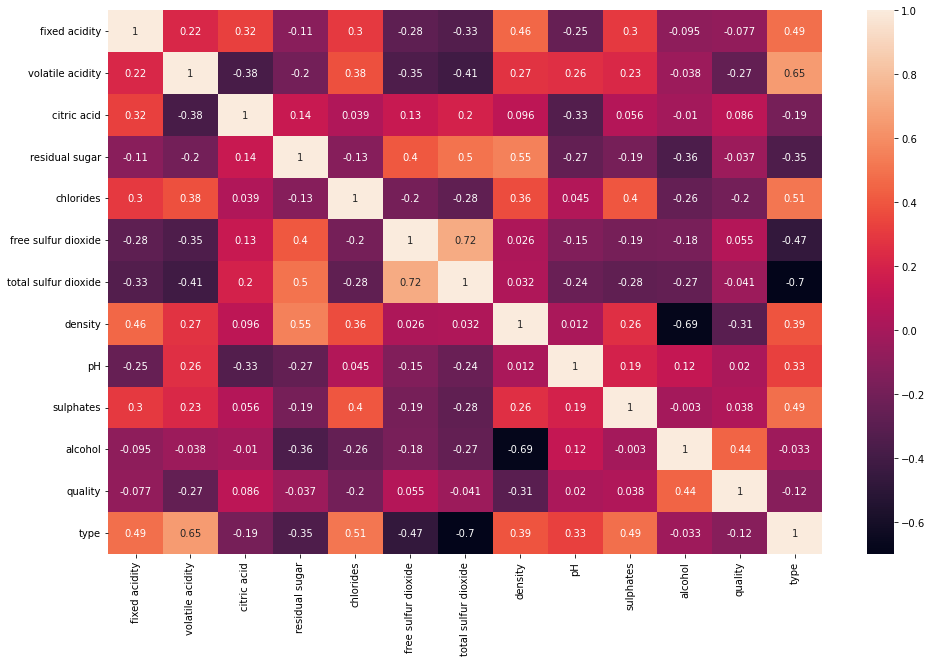

In [9]:
# Correlation between the features:
corr = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [11]:
# define X and y for the models:

X=df.drop('type',axis=1)
y=df['type']

In [12]:
# Standardizing the dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

X= preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set :', X_test.shape, y_test.shape)
print ('Total set :', X.shape, y.shape)


Train set: (5197, 12) (5197,)
Test set : (1300, 12) (1300,)
Total set : (6497, 12) (6497,)


In [13]:
# Model Data with Neural Network
# Import `Sequential` from `keras.models`
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop

# Initialize
model = Sequential()

# input layer 
model.add(Dense(12, activation='relu', input_shape=(12,)))

# hidden layer 
model.add(Dense(8, activation='relu'))

# output layer 
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
#model.get_config()

# List all weight tensors 
#model.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [15]:
#compile
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
                   
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=40,batch_size=1, verbose=0)


Title =  1 hidden layer, 8 neurons, opt=adam, activation = relu/sigmoid
Train: 0.999, Test: 0.993


<Figure size 432x288 with 0 Axes>

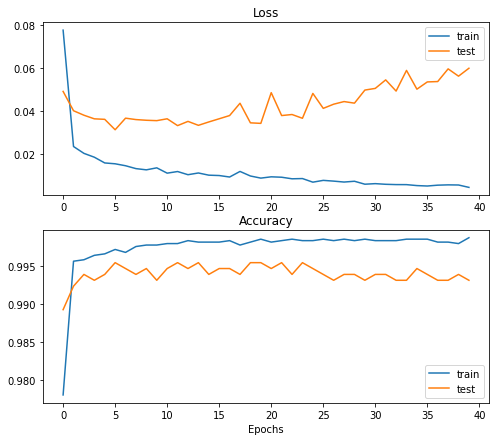

In [16]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
title='1 hidden layer, 8 neurons, opt=adam, activation = relu/sigmoid'
print('Title = ',title)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss_accuracy during training
plt.figure(figsize=(6,4))
plot_loss_accuracy (history)

In [17]:
# Tuning on Activation functions: ['relu', 'sigmoid', 'tanh']
activations = ['relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    #compile
    model.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy'])
    # Fit the model and store the history results
    history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test) ,verbose=0)
    activation_results[act] = history
    


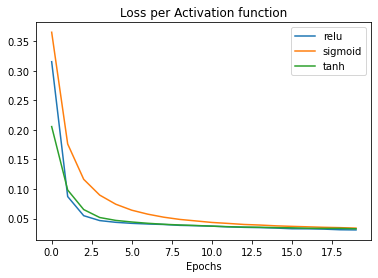

In [18]:
#Extract val_loss history of each activation function
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}

# Create a dataframe from val_loss_per_function
val_loss_curves = pd.DataFrame(val_loss_per_funct)

# Call plot on the dataframe
val_loss_curves.plot(title='Loss per Activation function')
plt.xlabel('Epochs')
plt.show()


Title =  Learning_rate=0.001 and activation= 'tanh'
Train: 0.998, Test: 0.994


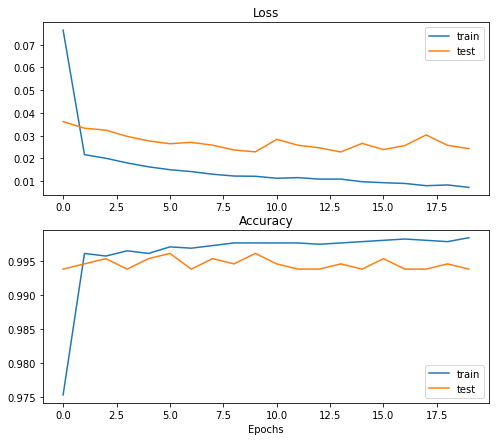

In [19]:
# Tuning on Learning_rate and Activation functions:
learning_rate = 0.001
activation = 'tanh'

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)  
model = create_model_learning_rate_act(learning_rate, activation)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20,batch_size=1, verbose=0)
title = "Learning_rate=0.001 and activation= 'tanh'"
evaluate_model(title, model, history, X_train, y_train, X_test, y_test)

Title =  number_layer=2 and  4 neurons/layer 
Train: 0.999, Test: 0.994


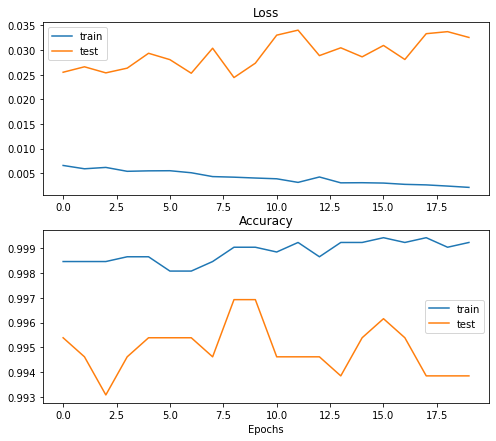

In [20]:
# Tuning on layer's number and Neuron's number per layer:
number_layer = 2
number_neuron = 4

create_model_learning_n_layer_nn(number_layer, number_neuron)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20,batch_size=1, verbose=0)

title = "number_layer=2 and  4 neurons/layer "
evaluate_model(title, model, history, X_train, y_train, X_test, y_test)

Title =  number_layer=2 and  8 neurons/layer 
Train: 1.000, Test: 0.993


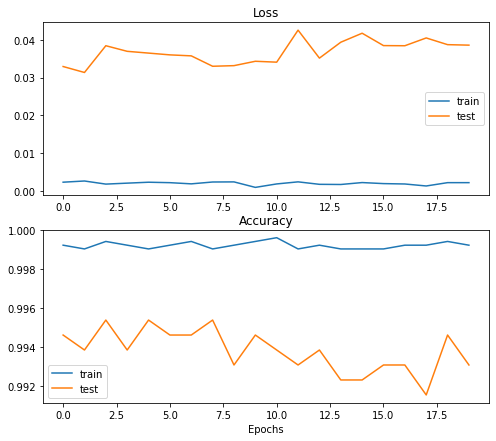

In [21]:
# Tuning on layer's number and Neuron's number per layer:
number_layer = 2
number_neuron = 8

create_model_learning_n_layer_nn(number_layer, number_neuron)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20,batch_size=1, verbose=0)

title = "number_layer=2 and  8 neurons/layer "
evaluate_model(title, model, history, X_train, y_train, X_test, y_test)

Title =  optimizer=SGD and learning_rate=0.001 
Train: 0.996, Test: 0.993


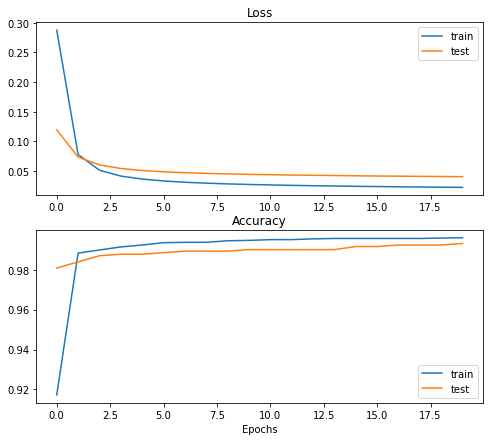

In [33]:
#Tuning on Optimizer and learning_rate
learning_rate=0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
model = create_model_learning_rate_opt(learning_rate, opt)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20,batch_size=1, verbose=0)

title = "optimizer=SGD and learning_rate=0.001 "
evaluate_model(title, model, history, X_train, y_train, X_test, y_test) 
  

In [24]:
# Import KerasClassifier from keras scikit learn wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold 
from sklearn.model_selection import cross_val_score


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.996152 using {'batch_size': 10, 'epochs': 50}
0.994997 (0.001440) with: {'batch_size': 10, 'epochs': 10}
0.996152 (0.000980) with: {'batch_size': 10, 'epochs': 50}
0.995190 (0.001185) with: {'batch_size': 10, 'epochs': 100}
0.994228 (0.001247) with: {'batch_size': 20, 'epochs': 10}
0.995959 (0.000471) with: {'batch_size': 20, 'epochs': 50}
0.994612 (0.000720) with: {'batch_size': 20, 'epochs': 100}
0.994035 (0.000720) with: {'batch_size': 40, 'epochs': 10}
0.995382 (0.000941) with: {'batch_size': 40, 'epochs': 50}
0.995767 (0.000719) with: {'batch_size': 40, 'epochs': 100}
0.992304 (0.001960) with: {'batch_size': 60, 'epochs': 10}
0.995575 (0.000719) with: {'batch_size': 60, 'epochs': 50}
0.995575 (0.001783) with: {'batch_size': 60, 'epochs': 100}
0.991148 (0.001517) with: {'batch_size': 80, 'epochs': 10}
0.996152 (0.000272) with: {'batch_size': 80, 'epochs': 50}
0.995382 (0.001246) with: {'batch_size': 80, 'epochs': 100}
0.989224 (0.000546) with: {'batch_size': 100, 'epochs': 

In [36]:
#GridSearchCV with optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

from tensorflow.keras import optimizers

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model_opt, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996344 using {'optimizer': 'RMSprop'}
0.995767 (0.001185) with: {'optimizer': 'SGD'}
0.996344 (0.000719) with: {'optimizer': 'RMSprop'}
0.986916 (0.001962) with: {'optimizer': 'Adagrad'}
0.723874 (0.074281) with: {'optimizer': 'Adadelta'}
0.994612 (0.000980) with: {'optimizer': 'Adam'}
0.995960 (0.001246) with: {'optimizer': 'Adamax'}
0.995574 (0.001186) with: {'optimizer': 'Nadam'}


In [40]:
#Tune the Number of Neurons in the Hidden Layer

from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

def create_model_n(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=12, kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model_n, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.994613 using {'neurons': 25}
0.992881 (0.002323) with: {'neurons': 1}
0.994420 (0.001783) with: {'neurons': 5}
0.994613 (0.001654) with: {'neurons': 10}
0.994420 (0.001903) with: {'neurons': 15}
0.994420 (0.001903) with: {'neurons': 20}
0.994613 (0.001961) with: {'neurons': 25}
0.994420 (0.001438) with: {'neurons': 30}


1 hidden layer & 25 neurons & batch_size=10 & epochs=50
optimizer=RMSprop & activation=relu & learning_rate=0.001
----------------------------------------------------------
Title =  Beste Model
Train: 0.998, Test: 0.995


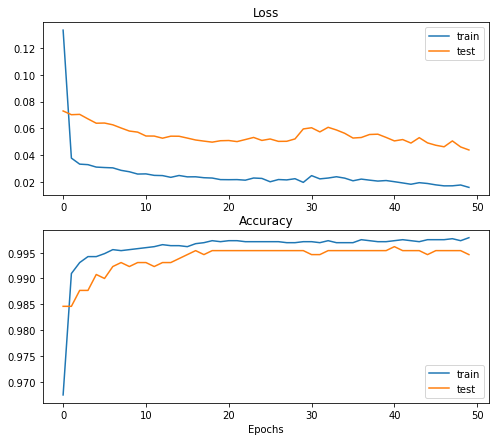

In [41]:
###########################
# Best model:
###########################
# 1 hidden layer
# 25 neurons
# Activation= 'relu'
# Optimizer='RMSprop'
# 'batch_size' =10
# 'epochs' =50
# learning_rate = 0.001
###########################

model = Sequential()
# input layer 
model.add(Dense(12, activation='relu', input_shape=(12,)))

# hidden layer 
model.add(Dense(25, activation='relu'))

# output layer 
model.add(Dense(1, activation='sigmoid'))
learning_rate=0.001
opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  
#compile
model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])
                   
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50,batch_size=10, verbose=0)
print('1 hidden layer & 25 neurons & batch_size=10 & epochs=50')
print('optimizer=RMSprop & activation=relu & learning_rate=0.001')
print('----------------------------------------------------------')
title = "Beste Model"
evaluate_model(title, model, history, X_train, y_train, X_test, y_test) 
  